In [3]:
import os

In [4]:
cog_data_dir = "/home/ashish/Documents/github/VA/data/cognitive_data"
phy_data_dir = "/home/ashish/Documents/github/VA/data/physical_data"

In [6]:
session_counter = 0
for user_id in range(1, 10):
    user_dir = os.path.join(cog_data_dir, f"user_{user_id}")
    for session in os.listdir(user_dir):
        session_dir = os.path.join(user_dir, session)
        for block in os.listdir(session_dir):
            # Sanity check if the directory has the name "block" or not
            if "block" not in block or "practice" in block.lower():
                # Ignore directories other than block
                continue
            block_dir = os.path.join(session_dir, block)
            eeg_dir = os.path.join(block_dir, "eeg")
            eeg_path = os.path.join(eeg_dir, os.listdir(eeg_dir)[0])
            print(f"{session_counter+1}. Session: {session[-1]} | User_ID: {user_id} | EEG_path: {eeg_path}")
            session_counter += 1
            break
        break
    break

1. Session: 1 | User_ID: 1 | EEG_path: /home/ashish/Documents/github/VA/data/cognitive_data/user_1/session_1/block3_2/eeg/1_3_2


In [23]:
def read_eeg_bands(eeg_path):
    bands = {
        'a': [], 'b': [], 'd': [], 'g': [], 't': [],
        'Aa': [], 'Ab': [], 'Ad': [], 'Ag': [], 'At': [],
        'as': [], 'bs': [], 'ds': [], 'gs': [], 'ts': [],
    }
    with open(eeg_path, 'r') as file:
        for line in file.readlines():
            values = line.split()
            if not values:
                continue
                
            if values[0] in bands.keys():
                bands[values[0]].append(list(map(lambda x: float(x), values[1:])))
                
    return bands

In [24]:
def store_bands_to_csv(bands):
    pass

In [28]:
bands = read_eeg_bands(eeg_path)
for band in bands:
    print(f'{band}: {len(bands[band])}')

a: 1751
b: 1751
d: 1751
g: 1751
t: 1751
Aa: 1751
Ab: 1751
Ad: 1751
Ag: 1751
At: 1751
as: 1751
bs: 1751
ds: 1751
gs: 1751
ts: 1751


## Plot these bands separately

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

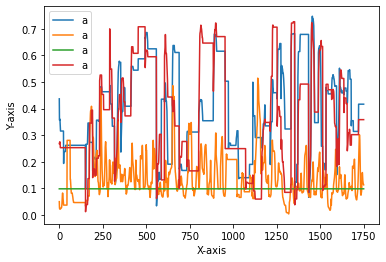

In [33]:
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
x = list(range(len(bands['a'])))
for band in bands:
    plt.plot(x, bands[band], label=band)
    break
    
plt.legend()
plt.show()